In [1]:
#%matplotlib inline
#%config InlineBackend.figure_format = 'retina'
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import camb
import pandas as pd
import healpy as hp
from camb import model, initialpower
from scipy.interpolate import interp1d

#Set up a new set of parameters for CAMB
pars = camb.CAMBparams()
Nside_red=16
Nside=512
l_gen=Nside*4
lmax=3*Nside_red-1
#pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
#pars.InitPower.set_params(As=2e-9, ns=0.965, r

const=1.88 * 10**(-9)
tau=0.06
# In[4]:
#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(H0=67.32, ombh2=0.02237, omch2=0.1201, mnu=0.06, omk=0, tau=tau)
pars.InitPower.set_params(As=const*np.exp(2*tau), ns=0.9651, r=0)
pars.set_for_lmax(l_gen, lens_potential_accuracy=0)
results = camb.get_results(pars)
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK',raw_cl=False)#spectra are multiplied by l*(l+1)/2pi
totCL=powers['total']
ls = np.arange(totCL.shape[0])
cl_obs=np.asarray(totCL[0:lmax,1])
ell = np.arange(0,lmax+1)
print(totCL[0:lmax,1])

[0.         0.         0.03463928 0.04716791 0.04361992 0.03117247
 0.01845482 0.01001796 0.00603698 0.00461806 0.00400701 0.00344949
 0.00294955 0.00268261 0.00267969 0.00284254 0.00306814 0.00337491
 0.00380969 0.00441385 0.00519969 0.00614918 0.00725436 0.00850558
 0.00990167 0.01144625 0.01314751 0.01500264 0.01699459 0.01915922
 0.02153676 0.02412296 0.02693136 0.02992362 0.03312916 0.03656306
 0.04025707 0.04421475 0.04840363 0.0528229  0.05748224 0.06239181
 0.0675631  0.07300775 0.07873524 0.08475223 0.09106187]


In [2]:
f_ = np.load('/home/amorelli/cl_generator/outfile_0.npz')
#https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html if i have multiple npz files

print(f_.files) #give the keywords for the stored arrays
data_in=f_["data"]
tau_in=f_["tau"]
#print(data[:15,0,2])
data=data_in[:]
print(data.shape)
tau=tau_in[:]

['data', 'tau']
(1100, 4, 47)


In [3]:
#i prepare the data
print(cl_obs)
print(data[0,0,:])
def normalize_cl(input_cl):
    output_cl=np.zeros(len(input_cl))
    for i in range(1,len(input_cl)):
        output_cl[i]=input_cl[i]/(i)/(i+1)*2*np.pi
    return output_cl
    

[0.         0.         0.03463928 0.04716791 0.04361992 0.03117247
 0.01845482 0.01001796 0.00603698 0.00461806 0.00400701 0.00344949
 0.00294955 0.00268261 0.00267969 0.00284254 0.00306814 0.00337491
 0.00380969 0.00441385 0.00519969 0.00614918 0.00725436 0.00850558
 0.00990167 0.01144625 0.01314751 0.01500264 0.01699459 0.01915922
 0.02153676 0.02412296 0.02693136 0.02992362 0.03312916 0.03656306
 0.04025707 0.04421475 0.04840363 0.0528229  0.05748224 0.06239181
 0.0675631  0.07300775 0.07873524 0.08475223 0.09106187]
[   0.            0.         1079.28860259 1019.80770566  960.91049972
  915.2061159   882.37423879  860.18080079  845.89836805  837.73444561
  834.35431746  834.25003222  837.85596042  843.03335211  849.74426081
  856.8126459   865.97605792  877.02189258  888.73933549  901.87192476
  914.80440313  928.22242956  942.14134019  956.16269898  970.59492325
  985.56314563 1000.57069384 1016.02600672 1031.76115486 1047.70323893
 1064.05477172 1080.21979291 1097.00989633 1113.

In [4]:
all_cl=np.zeros((len(tau)+1, lmax))
all_cl[0]=normalize_cl(cl_obs)
for i in range(1,len(tau)+1):
    d=data[i-1,1,:]
    all_cl[i]=normalize_cl(d)
print(all_cl.shape)
print(all_cl[0])
#print(tau[:2],all_cl[:3])

(1101, 47)
[0.00000000e+00 0.00000000e+00 3.62741727e-02 2.46970606e-02
 1.37036029e-02 6.52874650e-03 2.76083524e-03 1.12401287e-03
 5.26826065e-04 3.22401444e-04 2.28880068e-04 1.64195433e-04
 1.18798496e-04 9.26117767e-05 8.01761196e-05 7.44176165e-05
 7.08738836e-05 6.92980678e-05 6.99912625e-05 7.29816561e-05
 7.77871460e-05 8.36286556e-05 9.00800233e-05 9.68154228e-05
 1.03690065e-04 1.10644493e-04 1.17675601e-04 1.24688317e-04
 1.31502670e-04 1.38368874e-04 1.45504761e-04 1.52791363e-04
 1.60241232e-04 1.67571891e-04 1.74921553e-04 1.82327345e-04
 1.89896872e-04 1.97588507e-04 2.05215235e-04 2.12753875e-04
 2.20226561e-04 2.27653504e-04 2.35056200e-04 2.42453069e-04
 2.49852564e-04 2.57253132e-04 2.64643193e-04]


In [5]:
ntaus = 131
ntausover = 13001

taufid = 0.06

lmin=2
lmax=30

nside = 16
noise=4

nl = (noise * np.deg2rad(1./60.))**2

l = np.arange(lmin,lmax+1,1)

bl2 = ((hp.gauss_beam(np.deg2rad(440./60.), lmax=lmax, pol=False)*hp.pixwin(nside,pol=False,lmax=lmax))[lmin:lmax+1])**2

In [6]:
clobs = bl2*all_cl[0,lmin:lmax+1] + nl
logclobs = np.log(np.abs(clobs))

taus = tau*1.0
like = np.empty_like(taus)

In [7]:
for itau,tau in enumerate(taus):
    clth = bl2*all_cl[itau+1,lmin:lmax+1] + nl
    like[itau] = -0.5*np.sum((2*l+1)*(clobs/clth+np.log(np.abs(clth))-logclobs-1))

tausover = np.linspace(0.01,0.13,ntausover)


In [8]:
def unison_sorted_copies(a, b):
    assert len(a) == len(b)
    p = a.argsort()
    return a[p], b[p]
taus, like=unison_sorted_copies(taus,like)

0.060140201275720076 0.0020854822092087172


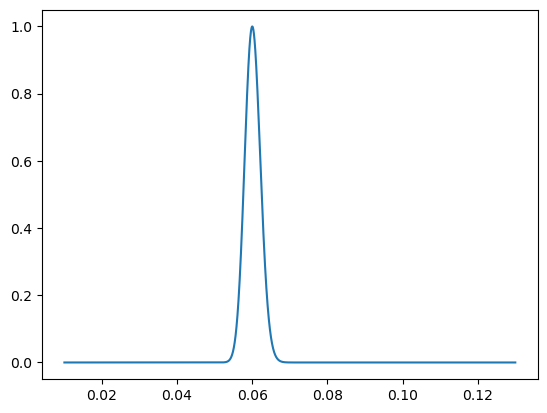

In [9]:
likeover = interp1d(taus,like,kind='cubic')(tausover)
probover = np.exp(likeover)

plt.plot(tausover,probover)

meantau = np.sum(probover*tausover)/np.sum(probover)
sigmatau = np.sqrt(np.sum(probover*tausover**2)/np.sum(probover) - meantau**2)

print(meantau,sigmatau)